In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from constants import macroWords, sectorWords, tickerList, companies
tickerDict = {v: k for k, v in companies.items()}
import itertools


In [50]:
df = pd.read_csv('Data/stocks_dateRange/f.csv', parse_dates=['date'], index_col=['date'])

In [33]:
df

,open,high,low,close,adjclose,volume
date,,,,,,
2006-10-20,8.070000,8.070000,7.93,8.010000,5.630212,25992400
2006-10-23,7.860000,8.030000,7.81,7.900000,5.552893,36182700
2006-10-24,8.020000,8.310000,7.95,8.300000,5.834052,38016400
2006-10-25,8.370000,8.650000,8.32,8.490000,5.967603,42475400
2006-10-26,8.590000,8.670000,8.45,8.480000,5.960574,27478400
...,...,...,...,...,...,...
2013-11-15,17.129999,17.150000,17.00,17.070000,12.547274,33100600
2013-11-18,17.070000,17.180000,16.92,16.980000,12.481121,31231300
2013-11-19,16.990000,17.030001,16.82,16.870001,12.400268,26841800


In [34]:
df.shape

(1785, 6)

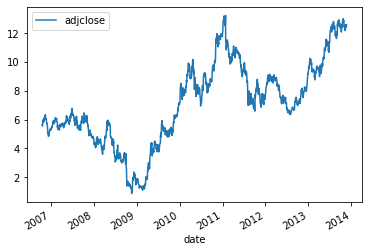

In [51]:
df.plot(y='adjclose', use_index=True)
df.head()
df.drop(['open', 'high', 'low', 'close', 'volume'], axis=1, inplace =True)

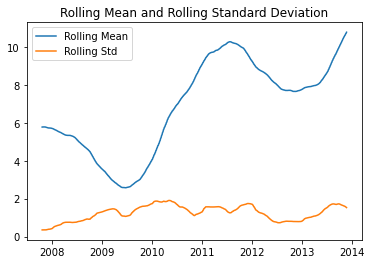

In [47]:
rolling_mean = df['adjclose'].rolling(window=252).mean()
rolling_std = df['adjclose'].rolling(window=252).std()

#plt.plot(df.index, df['adjclose'], color='blue', label='Original')
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.plot(rolling_std, label ='Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling Standard Deviation')
plt.show()

# Notice from the plot below that the standard deviation is stationary

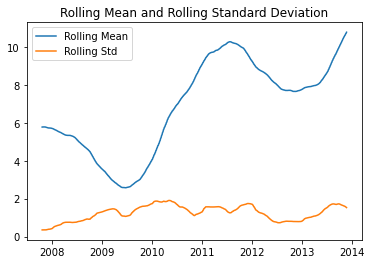

ADF Statistic: -0.7765813673332397
p-value: 0.8259045191249783
Critical Values:
	1%:-3.4340373743018104
	5%:-2.8631687706662676
	10%:-2.567637106781613


In [52]:
get_stationarity(df['adjclose'])

In [48]:
def get_stationarity(series):
    rolling_mean = series.rolling(window=252).mean()
    rolling_std = series.rolling(window=252).std()

    #plt.plot(series, color='blue', label='Original')
    plt.plot(rolling_mean,  label = 'Rolling Mean')
    plt.plot(rolling_std, label ='Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Rolling Standard Deviation')
    plt.show(block=False)
    
    # Dickey-Fuller test
    result = adfuller(series, autolag = 'AIC')
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}:{}'.format(key, value))
    

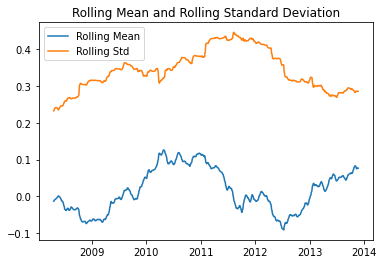

ADF Statistic: -9.30465194629681
p-value: 1.0889871523797436e-15
Critical Values:
	1%:-3.434068828903083
	5%:-2.8631826560063542
	10%:-2.5676445003500348


In [45]:
rolling_mean = df['adjclose'].rolling(window=12).mean()
rolling_std = df['adjclose'].rolling(window=12).std()
df_minus_mean = df['adjclose'] - rolling_mean
df_minus_mean.dropna(inplace =True)

get_stationarity(df_minus_mean)

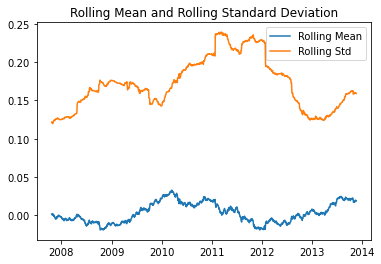

ADF Statistic: -13.835349563858351
p-value: 7.460916396015841e-26
Critical Values:
	1%:-3.4340373743018104
	5%:-2.8631687706662676
	10%:-2.567637106781613


In [49]:
df_shift = df - df.shift()
df_shift.dropna(inplace=True)
get_stationarity(df_shift)


In [77]:
# Test train split here
df_train = df_shift[0:int(0.8*df_shift.shape[0])]
df_test = df_shift[int(0.8*df_shift.shape[0]):]

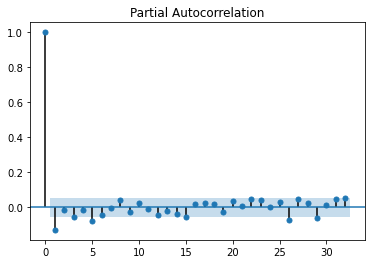

In [80]:
plot_pacf(df_train)
plt.show()
print()

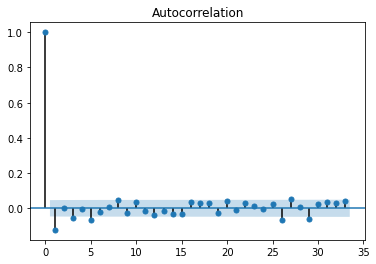

In [81]:
plot_acf(df_shift)
plt.show()


In [78]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
corr, cis = pacf(df_train, alpha=0.05)
significantLags = []
for i in (np.array(range(len(cis) - 1)) + 1):
    if 0 >= cis[i][0] and 0 <= cis[i][1]:
        continue
    else:
        significantLags.append(i)

# If more than one significant lags found, use AIC information criteria


# corr_e, cis_e = acf(df_shift, alpha=0.05)


In [79]:
print(significantLags)

[1, 3, 5, 15, 26, 29, 33, 34, 35, 39, 40]


In [93]:
def getCombinations(lst):
    combinations = set()
    for i in (np.array(range(len(lst))) + 1):
        for j in itertools.combinations(lst, i):
            combinations.add(j)
    return combinations
        
    

In [94]:
getCombinations([1, 3, 7])

{(1,), (1, 3), (1, 3, 7), (1, 7), (3,), (3, 7), (7,)}

In [ ]:
def AIC(lags):
    

In [ ]:
if len(significantLags) > 1:
    # run AIC criteria
    significantLags = bestLagsAIC(df_train, significantLags)
print(significantLags)

In [ ]:
# Fit the best AR model
# Obtain time series of residuals 
